In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
iris = pd.read_csv('data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

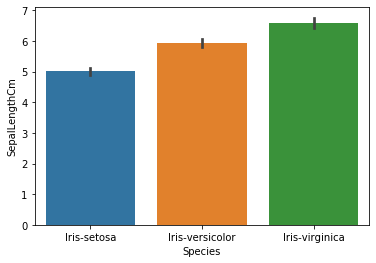

In [5]:
sns.barplot(x='Species', y='SepalLengthCm', data=iris)
plt.show()

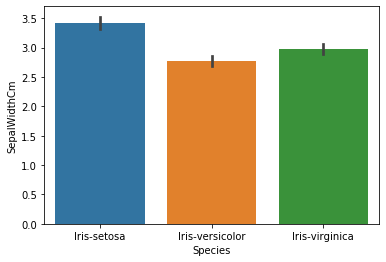

In [6]:
sns.barplot(x='Species', y='SepalWidthCm', data=iris)
plt.show()

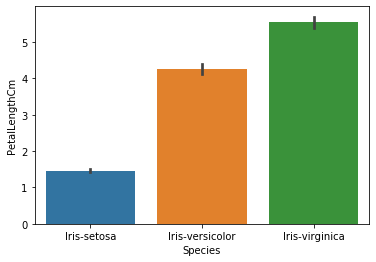

In [7]:
sns.barplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

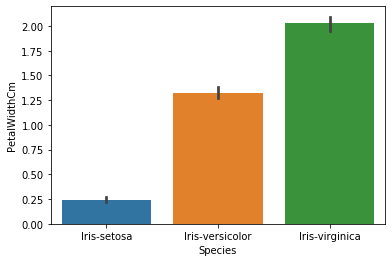

In [8]:
sns.barplot(x='Species', y='PetalWidthCm', data=iris)
plt.show()

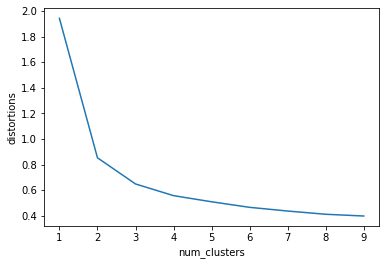

In [9]:
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [10]:
cluster_centers, distortion = kmeans(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], 3)

iris['cluster_labels'], distortion_list = vq(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], cluster_centers)

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [12]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
cluster_labels,,,,
0,5.883607,2.740984,4.388525,1.434426
1,6.853846,3.076923,5.715385,2.053846
2,5.006000,3.418000,1.464000,0.244000


In [13]:
iris.groupby('cluster_labels')['Id'].count()

cluster_labels
0    61
1    39
2    50
Name: Id, dtype: int64

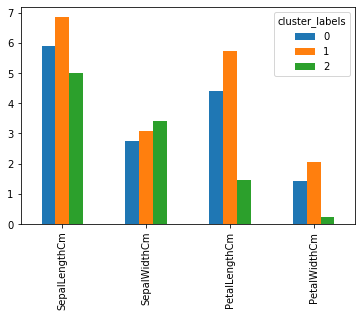

In [14]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean().transpose().plot(kind='bar')
plt.show()

In [15]:
iris_group = iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean().transpose()
iris_group

cluster_labels,0,1,2
SepalLengthCm,5.883607,6.853846,5.006
SepalWidthCm,2.740984,3.076923,3.418
PetalLengthCm,4.388525,5.715385,1.464
PetalWidthCm,1.434426,2.053846,0.244


In [16]:
iris[iris.cluster_labels==0].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
iris[iris.cluster_labels==1].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---

In [19]:
from sklearn.decomposition import PCA

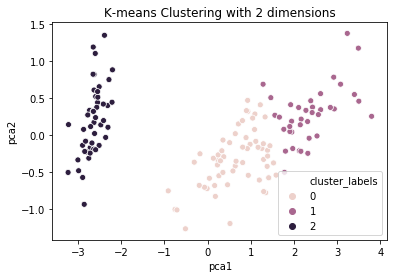

In [20]:
reduced_data = PCA(n_components=2).fit_transform(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=iris['cluster_labels'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

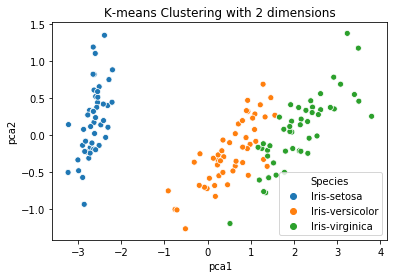

In [21]:
reduced_data = PCA(n_components=2).fit_transform(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=iris['Species'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()